# Customer segmentation

### 1.Problem statement

#### 1.1 Introduction

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


#### Dataset Features

#### People
*   **ID:** Customer's unique identifier
*   **Year_Birth:** Customer's birth year
*   **Education:** Customer's education level
*   **Marital_Status:** Customer's marital status
*   **Income:** Customer's yearly household income
*   **Kidhome:** Number of children in customer's household
*   **Teenhome:** Number of teenagers in customer's household
*   **Dt_Customer:** Date of customer's enrollment with the company
*   **Recency:** Number of days since customer's last purchase
*   **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
*   **MntWines:** Amount spent on wine in last 2 years
*   **MntFruits:** Amount spent on fruits in last 2 years
*   **MntMeatProducts:** Amount spent on meat in last 2 years
*   **MntFishProducts:** Amount spent on fish in last 2 years
*   **MntSweetProducts:** Amount spent on sweets in last 2 years
*   **MntGoldProds:** Amount spent on gold in last 2 years

#### Promotion
*   **NumDealsPurchases:** Number of purchases made with a discount
*   **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
*   **NumWebPurchases:** Number of purchases made through the company’s website
*   **NumCatalogPurchases:** Number of purchases made using a catalogue
*   **NumStorePurchases:** Number of purchases made directly in stores
*   **NumWebVisitsMonth:** Number of visits to company’s website in the last month.

### 2. Import Libraries and Data

In [141]:

# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [142]:
print("hello")

hello


In [143]:

data=pd.read_csv('data/marketing_campaign.csv',sep=';')

In [144]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### 3.Handling missing values

In [145]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [146]:
data=data.dropna()
# data.dropna(axis=1). for columns

In [147]:
data.duplicated().sum()

np.int64(0)

### 4. Feature Engineering

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

2216 entries, 0 to 2239
Data columns (total 29 columns)

Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

JetBrains Mono, Menlo, Monaco, Courier New, 

In [149]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [150]:
data['Age'] = 2015 - data['Year_Birth']
data['Age']

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2216, dtype: int64

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [151]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [152]:
data['Marital_Status']

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2216, dtype: object

In [153]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
#data['x']==access the series data, .replace is a series method replaces valuse inthe series 

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [154]:
data['Children'] = data['Kidhome'] + data['Teenhome']


To get further clarity of household, Creating feature indicating "Family_Size"

In [155]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']


Create a feature "Is_Parent" to indicate parenthood status

In [156]:
# np.where(condition, value_if_True, value_if_False)
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

In [157]:
data.Children
# data.Children is doing the exact same thing as data['Children'].
#  It is accessing the "Children" column of your DataFrame.

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

Segmenting education levels in three groups

In [158]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})


In [159]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34,422,Partner,1,3,1


Dropping some of the redundant features

In [160]:

to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

#redundent because
#id  it doesn't describe their personality or habits. It has no relationship with how much they spend.
# Year_Birth is redundant because of Age
# Marital_Status is redundant because of Living_With
# simplified 7-8 marital statuses into just two groups: 'Partner' or 'Alone' in the Living_With column.
# Z_CostContact and Z_Revenue
# are redundant because they are constant
# If you inspect these two columns, you will find they have the same value for every single customer. 
# A feature can only be useful if it helps you tell customers apart. If a 

In [161]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,422,Partner,1,3,1


###  5. Data Analysis and Visualization

In [162]:
data.shape


(2216, 29)

In [163]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,46.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


In [164]:
data.describe(include=object).T

# T=Transpose.of data
# It tells pandas to ignore the numerical columns and instead analyze only the columns with the object data type. In pandas, object almost always means the column contains strings (text)

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


In [165]:

import matplotlib.pyplot as plt

# Set the default font family for 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']


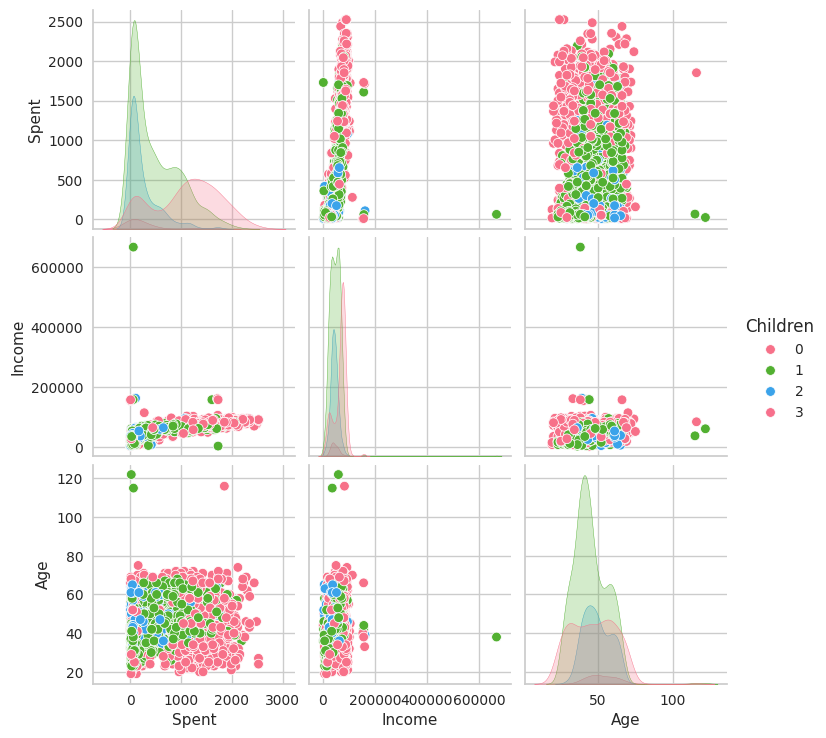

In [166]:
import seaborn as sns
import matplotlib as mlt
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

**Off-diagonal plots**(e.g., Income vs. Spent): These are scatter plots that show the relationship between two different variables.
**Diagonal plots** (e.g., Age vs. Age): These are histograms that show the distribution of one single variable.

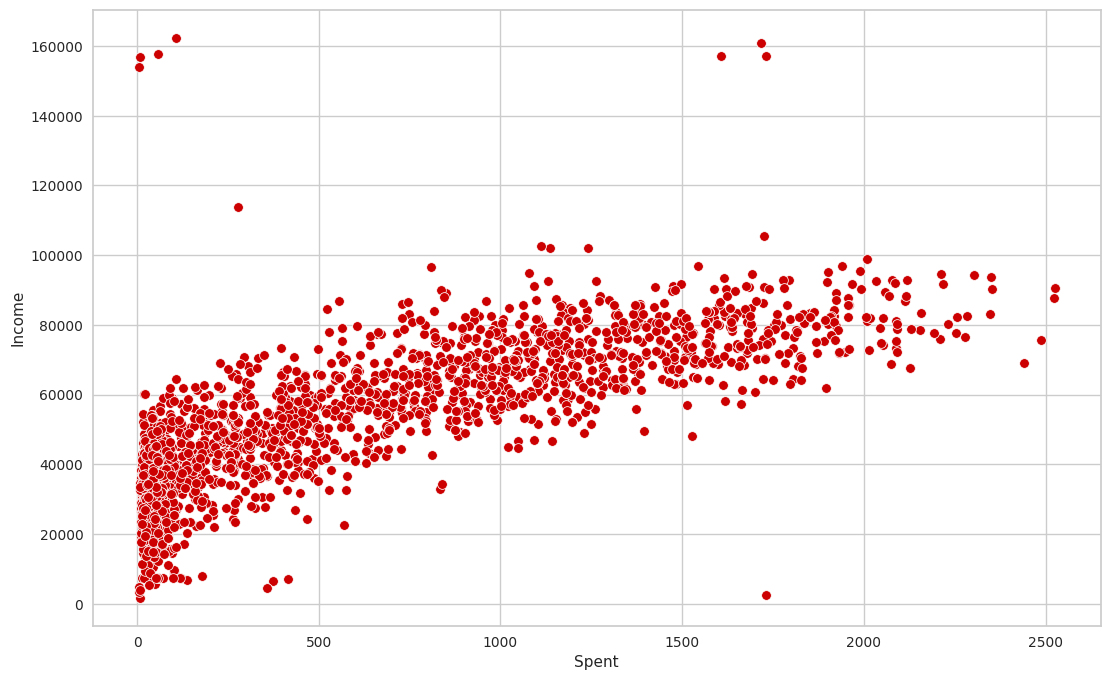

In [167]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');
# So, the process was: FILTER ROWS FIRST, THEN SELECT THE COLUMN.

# ['Spent']: After filtering the data, this selects the 'Spent' column to be used for the x-axis (horizontal).
# ['Income']: After filtering, this selects the 'Income' column for the y-axis (vertical).
# It's crucial that the exact same filter is applied to get both the x and y data, ensuring you are plotting the correct spending and income for the same set of customers.

##### insight
+ people with lower incomes and correspondingly lower spending habits. While they are numerous, each individual customer in this group contributes less to the total revenue.

+ At a low-income level, everyone's spending is low. At a high-income level, some people spend a lot, but others might still spend relatively little.High income is a strong indicator of high spending potential, but it's not a guarantee. Other factors (like age, family status, or personal preference) influence the spending habits of wealthy customers


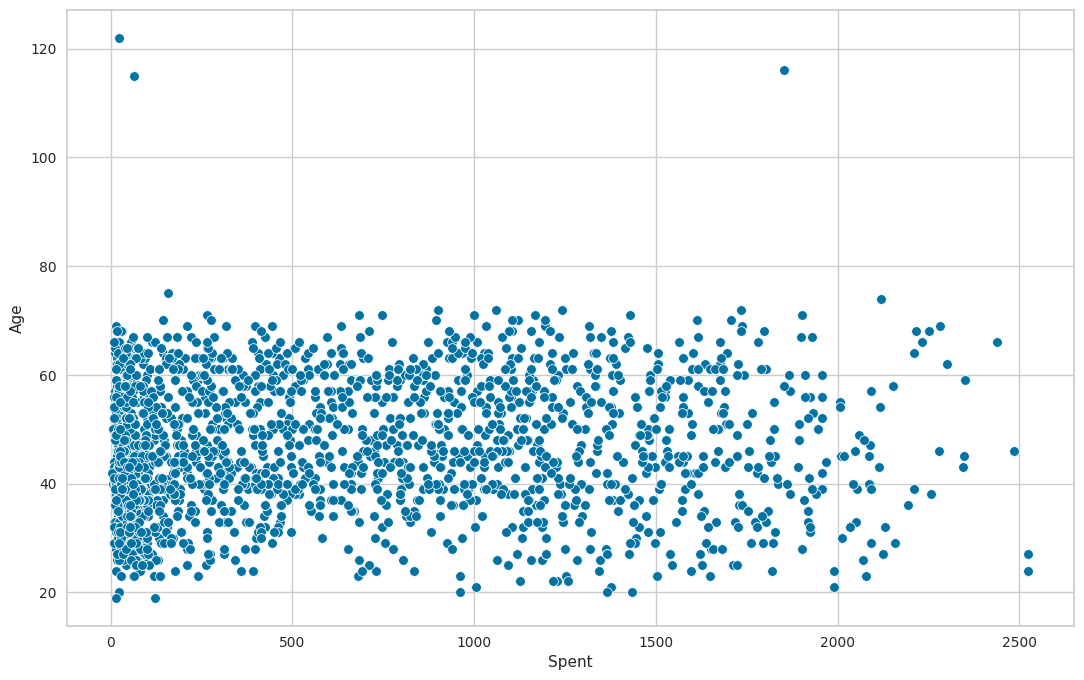

In [168]:

plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);

+ Low Spending Among Younger Customers: 
+ Decreased Spending Among Older Customers: 

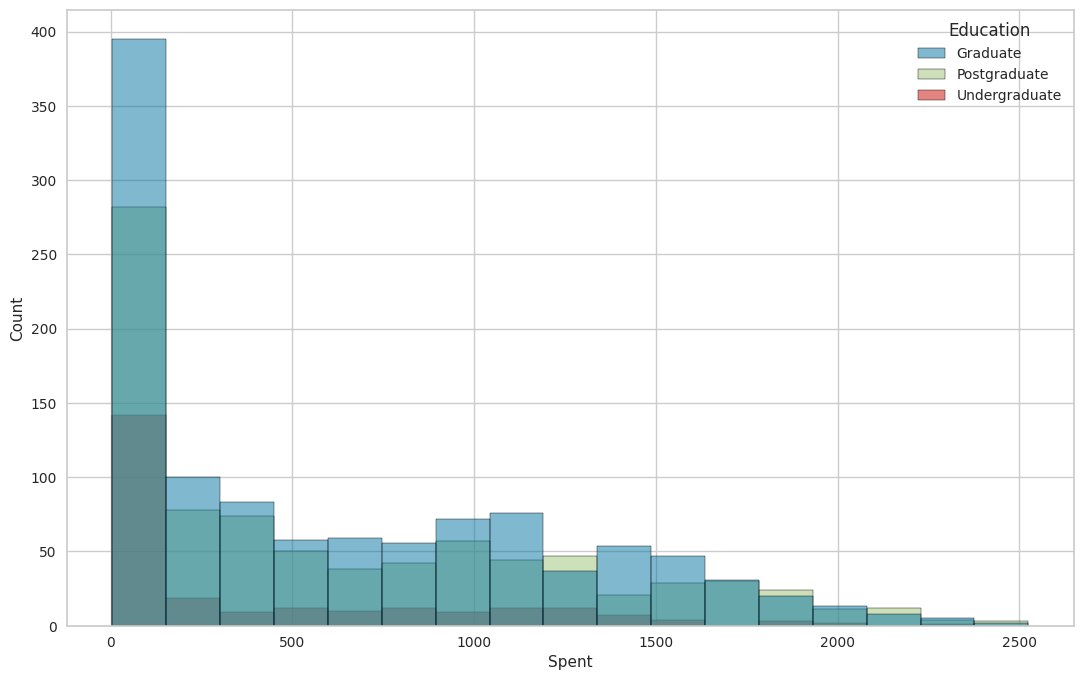

In [169]:
plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);

* Higher Education Correlates with Higher Spending:
+ Lower Education Levels are Concentrated in Low Spending Brackets:

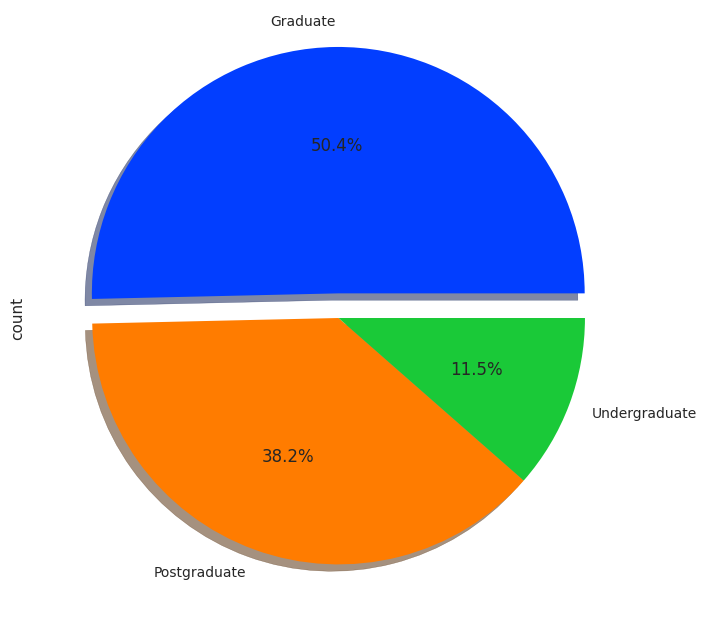

In [170]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));


### 6. Outlier Detection

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.

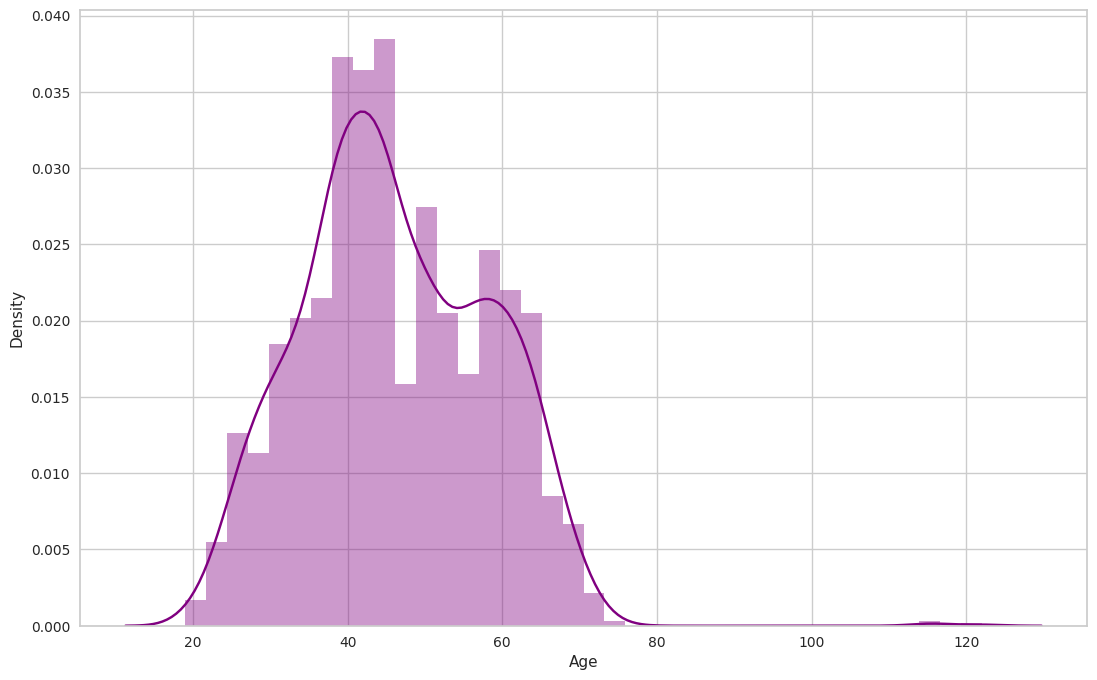

In [171]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='purple');

# distplot was the go-to function at the start of an analysis to quickly understand the nature of a
#  single numerical column.
#  You would use it to answer questions like:
# combines three plots-A Histogram,A KDE ,A Rug Plot:

 This visually confirms that your largest single concentration of customers is middle-aged. This is your core demographic from an age perspective. Marketing campaigns, product features, and brand messaging should be tailored to appeal to this group.

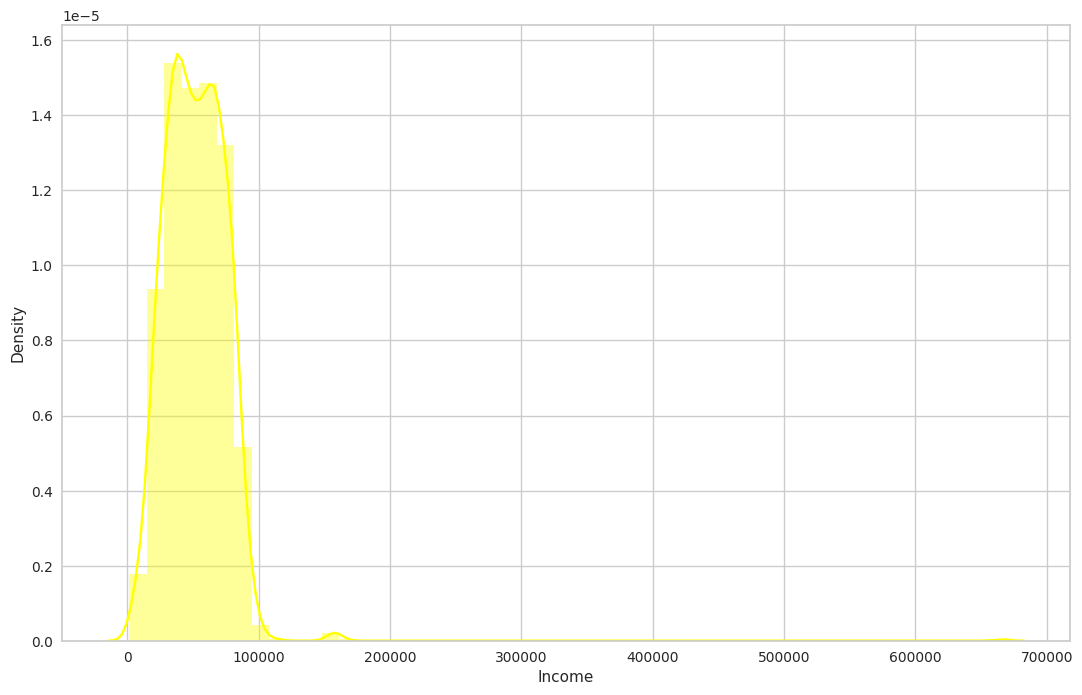

In [172]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Yellow');

 - Skewed Distribution
 the vast majority of your customers exist in a relatively narrow, low-to-middle income range. This is your core,

 The "Average" Income is Misleading: Because of the long tail of high earners,  average (mean) income of  customers would be pulled upwards by the outliers. This average would be higher than what the typical customer actually earns, giving  false impression of main customer base. The median income would be a much more accurate measure of the "typical" customer.


 Two-Tiered Marketing Strategy: This distribution strongly suggests you need a two-tiered strategy:

- For the Mass Market
- For the High-Value

<Axes: xlabel='Spent', ylabel='Density'>

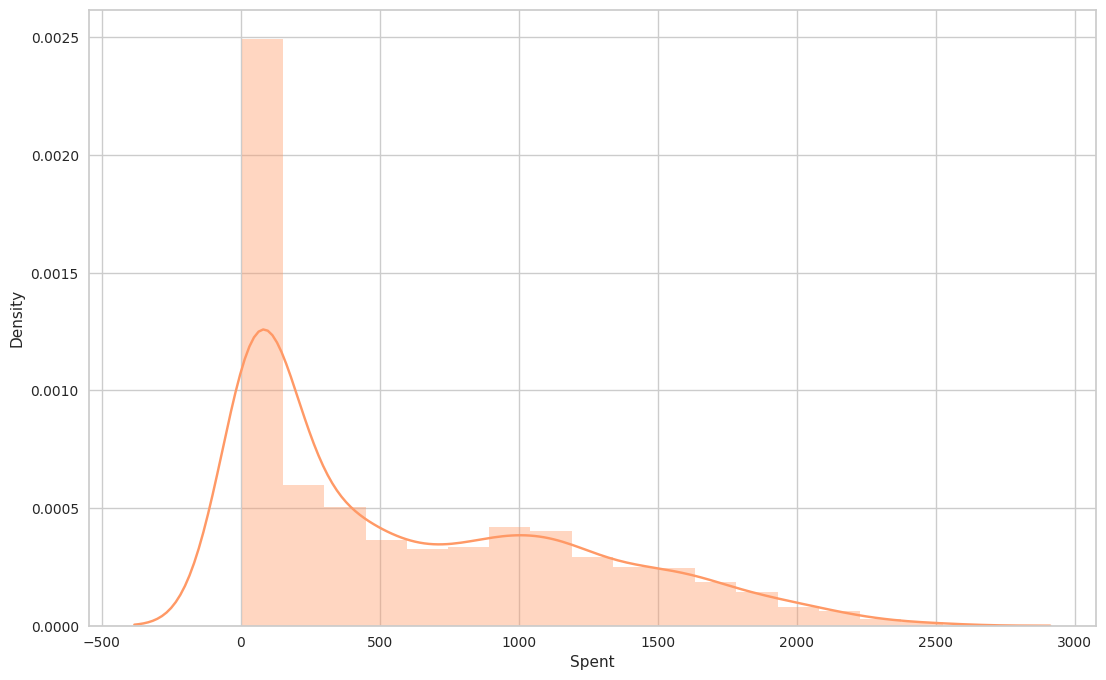

In [173]:


plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#ff9966')

### 7.Check for Rare Categories

Some categories may appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.
Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

In [174]:
categorical = [var for var in data.columns if data[var].dtype=='O']


In [175]:
# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / np.float64(len(data)))
    print()
    print()

Education
Graduate         0.503610
Postgraduate     0.381769
Undergraduate    0.114621
Name: count, dtype: float64


Living_With
Partner    0.645307
Alone      0.354693
Name: count, dtype: float64




As shown above, there is no rare category in the categorical variables.

### 7. Categorical variable encoding

In [176]:
categorical

['Education', 'Living_With']

In [177]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [178]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})


In [179]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,Alone,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,Alone,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,Partner,0,2,0
3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,53,Partner,1,3,1
4,2,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,422,Partner,1,3,1


In [180]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})


In [181]:
data['Living_With'] 

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Living_With, Length: 2216, dtype: int64

<Axes: >

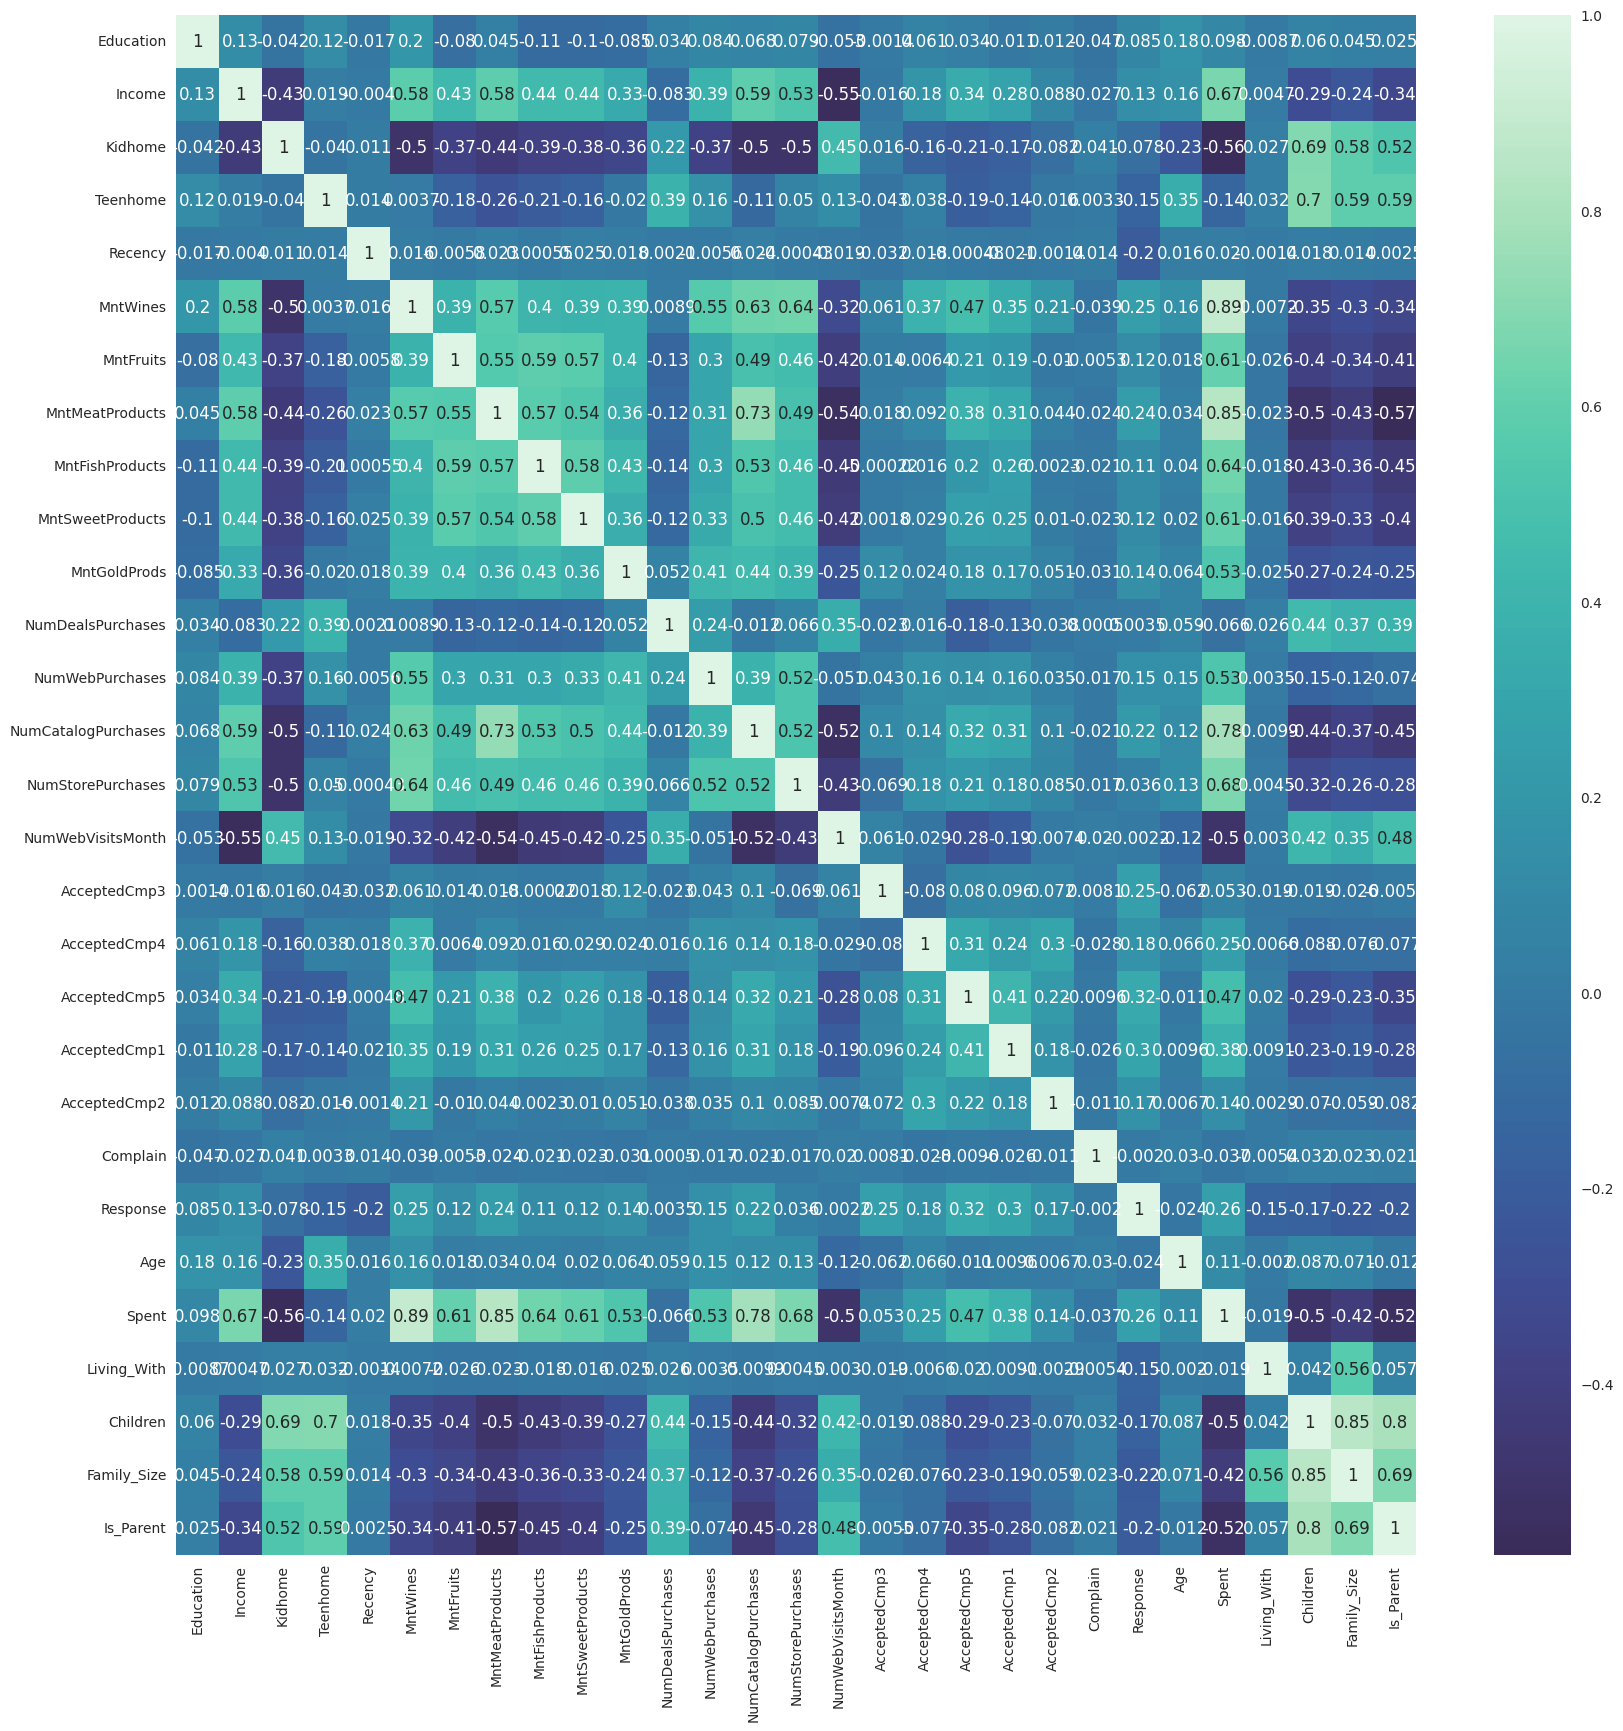

In [182]:
corrmat = data.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

### 8. Feature Scaling

In [183]:
data_old = data.copy()

In [184]:
data_old 

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,1,0,2,0
3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,53,1,1,3,1
4,2,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,48,1341,1,1,3,1
2236,2,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,69,444,1,3,5,1
2237,1,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,34,1241,0,0,1,0
2238,2,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,59,843,1,1,3,1


In [185]:
#  creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)
#Accepted-These columns represent whether a customer accepted an offer from a specific marketing campaign.
#complain-focus on behavioral and demographic traits rather than specific administrative events.

In [186]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [187]:
data

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.409776,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443,1.675488,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.409776,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,-0.962358,-1.348829,1.405806,0.450009,0.632356
2,-0.409776,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822,0.280250,0.741384,-1.264803,-0.654332,-1.581389
3,-0.409776,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,-0.919224,0.741384,0.070501,0.450009,0.632356
4,1.124115,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420,-0.307044,0.741384,0.070501,0.450009,0.632356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.409776,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,0.151917,1.217598,0.741384,0.070501,0.450009,0.632356
2212,1.124115,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,1.904422,-0.270546,0.741384,2.741110,2.658691,0.632356
2213,-0.409776,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-1.016420,1.051696,-1.348829,-1.264803,-1.758673,-1.581389
2214,1.124115,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,1.069896,0.391404,0.741384,0.070501,0.450009,0.632356


The simple answer is: StandardScaler is used to put all your features onto the same scale.

This is necessary because the clustering algorithm (K-Means) works by measuring the distance between data points. If your features are on different scales, the algorithm will be biased.



### 9. Dimensionality Reduction

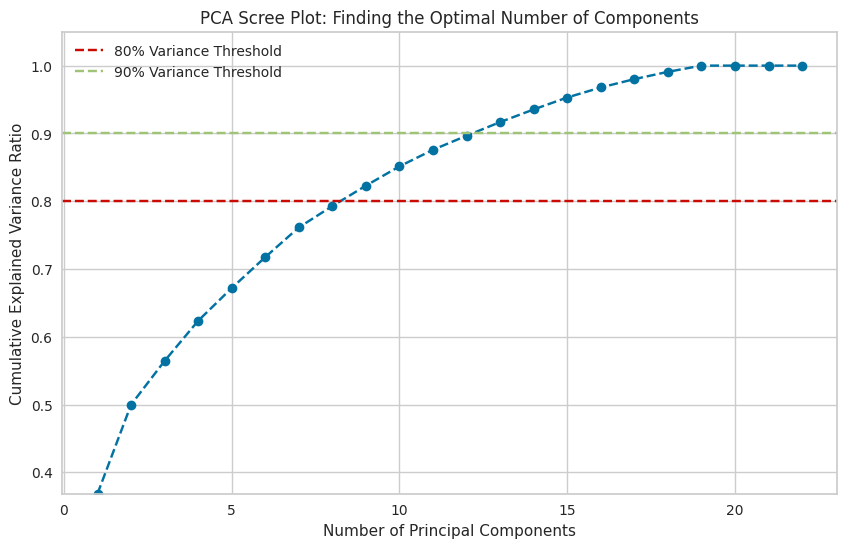

In [188]:
# Make sure you have your scaled data in a DataFrame named 'data' before this cell.
# If your scaled data is in a different variable, change 'data' to that name.

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1. Run PCA without specifying n_components to analyze all of them
pca_analyzer = PCA()
pca_analyzer.fit(data)

# 2. Calculate the cumulative sum of explained variance for each component
cumulative_variance = np.cumsum(pca_analyzer.explained_variance_ratio_)

# 3. Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')

plt.title('PCA Scree Plot: Finding the Optimal Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)

# 4. Add a horizontal line for the 80% and 90% thresholds for reference
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Variance Threshold')

# Set the y-axis to be from your first component's variance to 1.05
# This helps in zooming into the relevant part of the plot
plt.ylim(cumulative_variance[0], 1.05) 

plt.legend(loc='best')
plt.show()


In [202]:
p = PCA(n_components=8)
p.fit(data)
     

,n_components,8
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


The purpose of PCA is to reduce the number of features (columns) in your dataset while trying to keep as much of the original information as possible. It combats the "Curse of Dimensionality" 

In [203]:
W = p.components_.T
W
     

array([[ 0.01040881,  0.1383498 ,  0.49522437,  0.18234746,  0.40632032,
         0.23029577, -0.24448989,  0.21188436],
       [ 0.24306385,  0.16649081,  0.06521384,  0.1812299 , -0.01491005,
         0.04747284, -0.21635646, -0.23351712],
       [-0.24866014,  0.00214804, -0.28858219,  0.01129682,  0.10992639,
         0.22106189, -0.39659722,  0.24470466],
       [-0.10362107,  0.45977583,  0.15876547,  0.03139446, -0.31878444,
        -0.12217101, -0.00455595, -0.23778519],
       [ 0.0030292 ,  0.01528382, -0.03785187,  0.03423359, -0.31299654,
         0.86502035,  0.37342483, -0.03894477],
       [ 0.25661946,  0.2146136 ,  0.12303119, -0.06327917,  0.26632877,
         0.10830337,  0.03933396, -0.12006888],
       [ 0.24129084,  0.01735571, -0.25154097,  0.00637373, -0.17056023,
        -0.06338739, -0.14632609,  0.13885724],
       [ 0.28779127,  0.01477833, -0.08059128,  0.09574244,  0.09147741,
         0.14755415, -0.2004884 ,  0.15904242],
       [ 0.25160231,  0.00616205

 .components_  This is a property of the fitted PCA model. It contains the actual principal components. It's a matrix where each row represents one of the principal components,columns correspond to the original features.T is the transpose operator 

In [204]:
p.explained_variance_


array([8.11042806, 2.88992787, 1.42142267, 1.30283753, 1.06299114,
       1.00373748, 0.96377381, 0.69621689])


The attribute p.explained_variance_ tells you how much information (variance) each of your principal components has captured from the original data.

Think of variance as a measure of how spread out your data is/. A feature with a small range (like Children) has low variance. The total variance of your dataset is the sum of the variances of all its features. This represents the total amount of "information" or "uniqueness" in your data.

PCA's goal is to create new components that capture as much of this total variance as possible, in order.

In [205]:
p.explained_variance_ratio_

array([0.36848946, 0.13130108, 0.06458097, 0.05919316, 0.04829598,
       0.04560384, 0.04378813, 0.03163194])

In [207]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3','col4','col5','col6','col7','col8']))

In [208]:


data_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-6.412841e-18,2.847881,-5.818376,-2.494431,-0.777550,2.378863,7.376778
col2,2216.0,-7.695409e-17,1.699979,-4.352801,-1.336552,-0.130344,1.223281,6.222828
col3,2216.0,2.565136e-17,1.192234,-4.902613,-0.834280,0.013971,0.856157,3.499345
col4,2216.0,4.008025e-18,1.141419,-5.737117,-0.757376,0.099381,0.831243,4.585331
col5,2216.0,-1.362729e-17,1.031015,-4.379147,-0.684828,0.005540,0.698041,3.647550
col6,2216.0,-5.450914e-17,1.001867,-3.257782,-0.745788,0.041644,0.760001,4.056198
col7,2216.0,-2.565136e-17,0.981720,-5.645604,-0.644431,-0.007400,0.616659,3.466055
col8,2216.0,1.442889e-17,0.834396,-5.535077,-0.534242,-0.001298,0.508452,4.908268


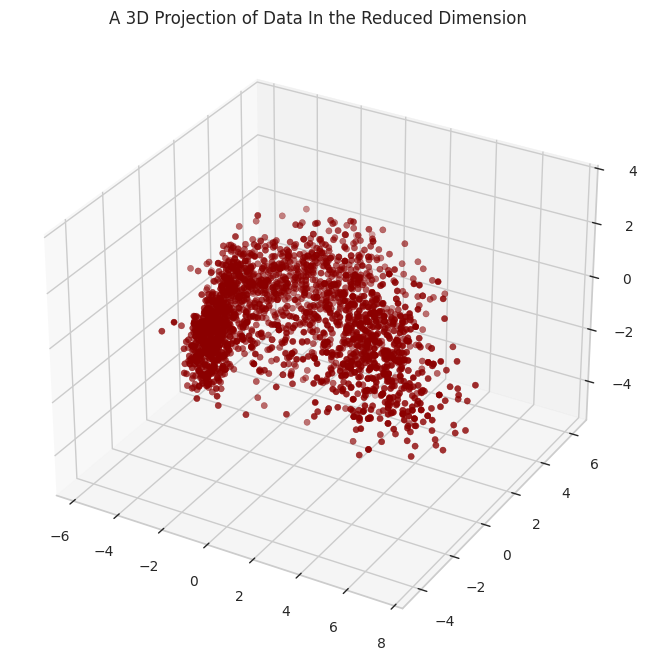

In [210]:

x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

### 10. Clustering

Elbow Method to determine the number of clusters to be formed.

 This is a general technique, and in your project, it's used in two separate placesFor PCA: To decide on the number of components.For K-Means Clustering: To decide on the number of clusters (k).
Let's break it down.

In machine learning, you constantly face trade-offs. The one you're dealing with now is Simplicity vs. Information.

Goal 1: Maximum Information. You want your model to be as accurate as possible, which means using all the available information (keeping all 11+ features).
Goal 2: Maximum Simplicity. You want a model that is easy to understand, visualize, and fast to run (reducing 11+ features to just 3).
These goals are in direct conflict.

Keeping all features gives you 100% of the information but zero simplicity.
Reducing to 1 feature gives you maximum simplicity but you lose a huge amount of information.

The Elbow Method is a visual technique to find the best compromise—the "sweet spot" in this trade-off.The "elbow" is that point where putting in more effort (adding another component or cluster) stops giving you a big reward. It's the point of diminishing returns.

Elbow Method to determine the number of clusters to be formed.

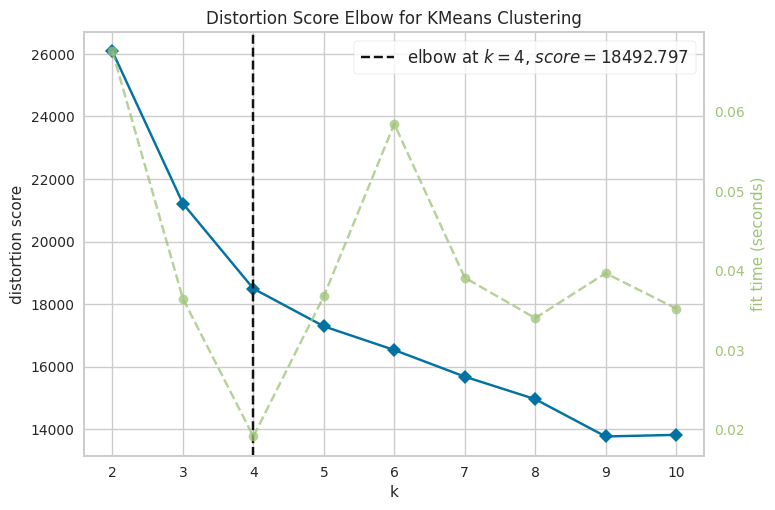

In [239]:

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show();

In [240]:
# Select and train the best model based on the elbow plot
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(data_PCA)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [241]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC
     

In [242]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Your PCA-transformed data is ready
# data_PCA = ...

# --- Model 1: K-Means ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data_PCA)

# --- Model 2: Agglomerative Clustering ---
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(data_PCA)

# --- Evaluate Both Models ---
# Calculate metrics for K-Means
kmeans_silhouette = silhouette_score(data_PCA, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(data_PCA, kmeans_labels)

# Calculate metrics for Agglomerative Clustering
agg_silhouette = silhouette_score(data_PCA, agg_labels)
agg_davies_bouldin = davies_bouldin_score(data_PCA, agg_labels)


# --- Print the Results ---
print("--- Model Evaluation Results ---")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Davies-Bouldin Score: {kmeans_davies_bouldin:.3f}")
print("-" * 30)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.3f}")
print(f"Agglomerative Clustering Davies-Bouldin Score: {agg_davies_bouldin:.3f}")


--- Model Evaluation Results ---
K-Means Silhouette Score: 0.242
K-Means Davies-Bouldin Score: 1.488
------------------------------
Agglomerative Clustering Silhouette Score: 0.234
Agglomerative Clustering Davies-Bouldin Score: 1.461


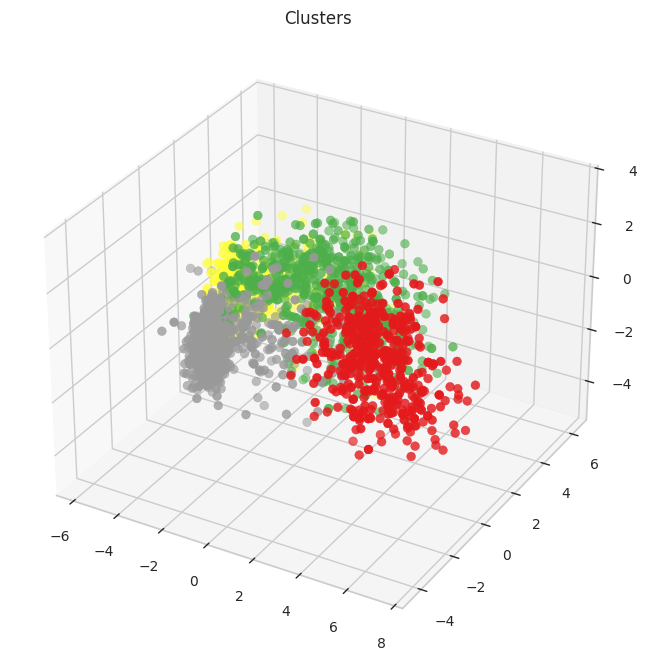

In [243]:


fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

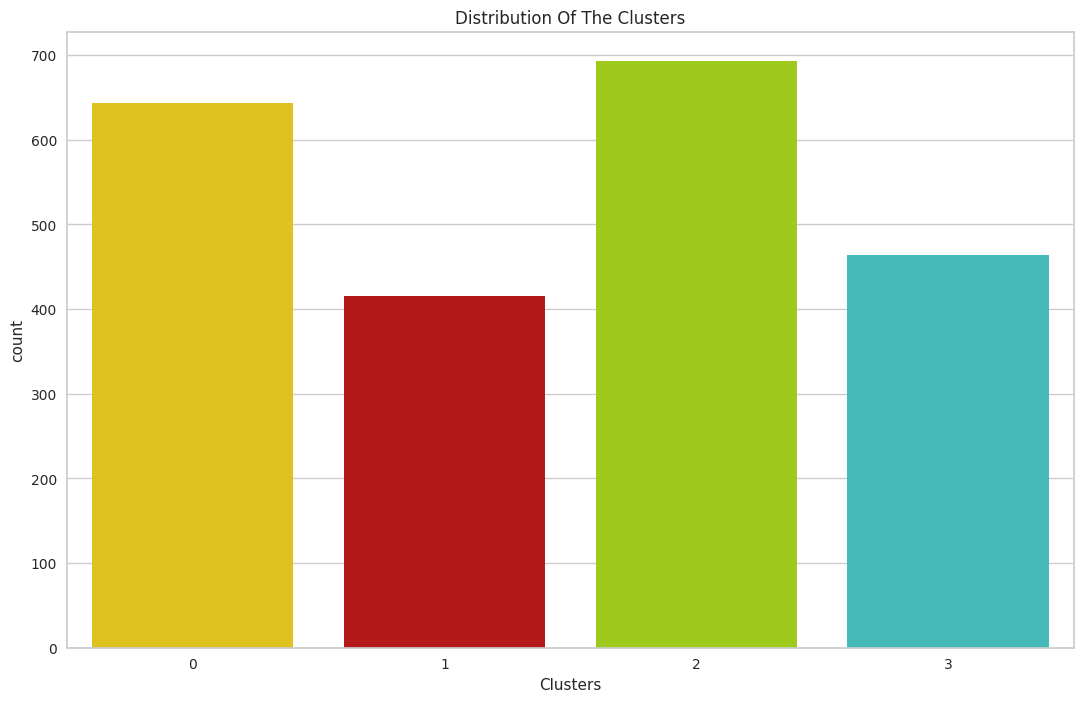

In [244]:

pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()
     

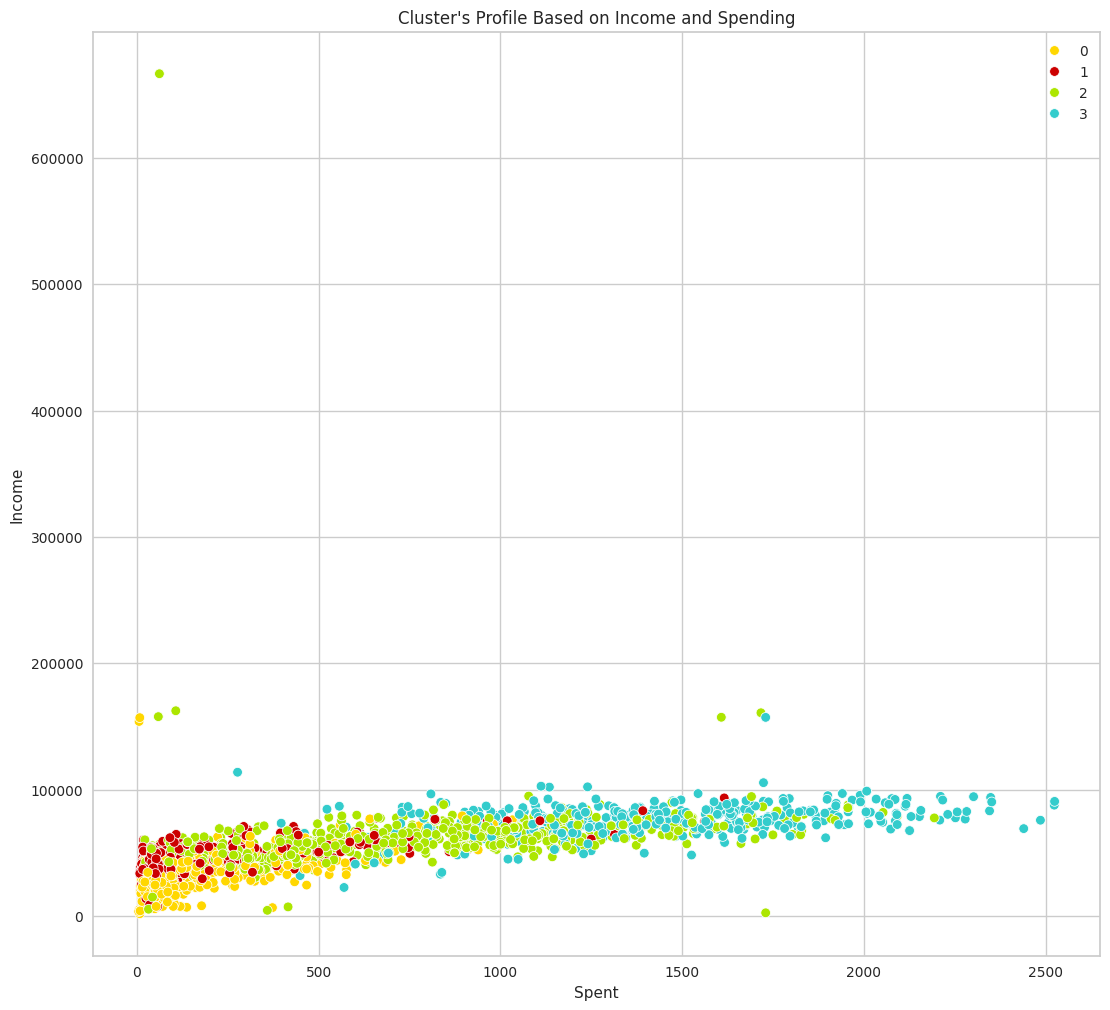

In [245]:
plt.figure(figsize=(13,12))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

In [246]:
import pandas as pd

# This makes the numbers in our output table easier to read
pd.options.display.float_format = '{:,.2f}'.format

# Let's assume 'data_old' is your original DataFrame with the 'Clusters' column added
# We will create a summary DataFrame to analyze the personas

# First, let's see how many customers are in each segment
cluster_personas = data_old.groupby('Clusters').size().to_frame(name='Count')

# Now, let's calculate the average for the most important features for each segment
persona_columns = [
    'Income',
    'Spent',
    'Kidhome',
    'Teenhome',
    'MntWines',
    'MntMeatProducts',
    'MntFruits',
    'MntSweetProducts',
    'NumWebPurchases',
    'NumStorePurchases',
    'NumCatalogPurchases',
    'NumDealsPurchases'
]
cluster_personas = cluster_personas.join(data_old.groupby('Clusters')[persona_columns].mean())

print("--- Customer Segment Persona Analysis ---")
print(cluster_personas)


--- Customer Segment Persona Analysis ---
          Count    Income    Spent  Kidhome  Teenhome  MntWines  \
Clusters                                                          
0           644 32,115.98   147.56     0.76      0.00     54.37   
1           415 43,770.59   211.78     1.06      1.07    124.12   
2           693 60,065.11   731.27     0.07      0.97    428.11   
3           464 76,093.32 1,412.91     0.00      0.00    631.19   

          MntMeatProducts  MntFruits  MntSweetProducts  NumWebPurchases  \
Clusters                                                                  
0                   39.13       8.56              8.62             2.56   
1                   44.44       6.00              6.93             3.01   
2                  150.26      28.56             29.23             5.56   
3                  479.06      65.97             67.27             4.97   

          NumStorePurchases  NumCatalogPurchases  NumDealsPurchases  
Clusters                          

# Customer Segment Personas

This document provides a detailed breakdown of the four key customer segments discovered through K-Means clustering analysis. These personas are the final output of the unsupervised learning phase and serve as the foundation for targeted marketing strategies and the subsequent classification model.

---

### Persona 1: The Affluent VIP (Cluster 3)

*   **Who They Are:** This is our most valuable segment. They have the **highest income** (avg. $76k) and typically have no children at home. They are established and have high disposable income.
*   **Spending Behavior:** They are the biggest spenders by a wide margin (avg. $1,412). Their purchasing is heavily skewed towards high-margin luxury items, specifically **wine** and **meat**.
*   **Marketing Strategy:** **Premium & Exclusive.** This group is entirely insensitive to discounts. Marketing efforts should focus on loyalty programs, exclusive product access, and high-touch service. Target them with new premium arrivals, not sales promotions.

---

### Persona 2: The Established Core (Cluster 2)

*   **Who They Are:** This is our largest and most consistent customer base. They have a solid upper-middle income (avg. $60k) and often have teenagers at home.
*   **Spending Behavior:** They are reliable, high-frequency shoppers with significant spending power (avg. $731). Like the VIPs, they have a strong preference for **wine** and **meat**. They are true omnichannel shoppers, active across web, store, and catalog.
*   **Marketing Strategy:** **Quality & Engagement.** This group represents the core of the business. The goal is to maintain their loyalty and increase their cart size. Target them with new product pairings, quality-focused content, and engage them across all shopping channels.

---

### Persona 3: The Deal-Hunting Parents (Cluster 1)

*   **Who They Are:** This segment consists of families with a modest income (avg. $43k) and children of all ages at home.
*   **Spending Behavior:** Their overall spending is low (avg. $211). Their defining characteristic is their response to promotions; they are by far the **most deal-sensitive group**.
*   **Marketing Strategy:** **Promotions & Discounts.** This group is primarily motivated by price. The most effective way to activate them is through discount codes, coupons, and BOGO offers. Digital advertising focusing on "value" is the best channel to reach them.

---

### Persona 4: The Budget-Conscious Starter (Cluster 0)

*   **Who They Are:** These are our youngest customers, often families with very young children and the **lowest income** (avg. $32k).
*   **Spending Behavior:** They are extremely frugal, with the lowest spending of any segment (avg. $147). They do not have a preferred product category and are infrequent shoppers.
*   **Marketing Strategy:** **Brand Awareness & Entry-Level Offers.** This is a difficult segment to monetize. The primary goal is to keep the brand top-of-mind with low-cost, entry-level product offers. They are a low priority for major campaigns but could be nurtured to grow into a more valuable segment over time.


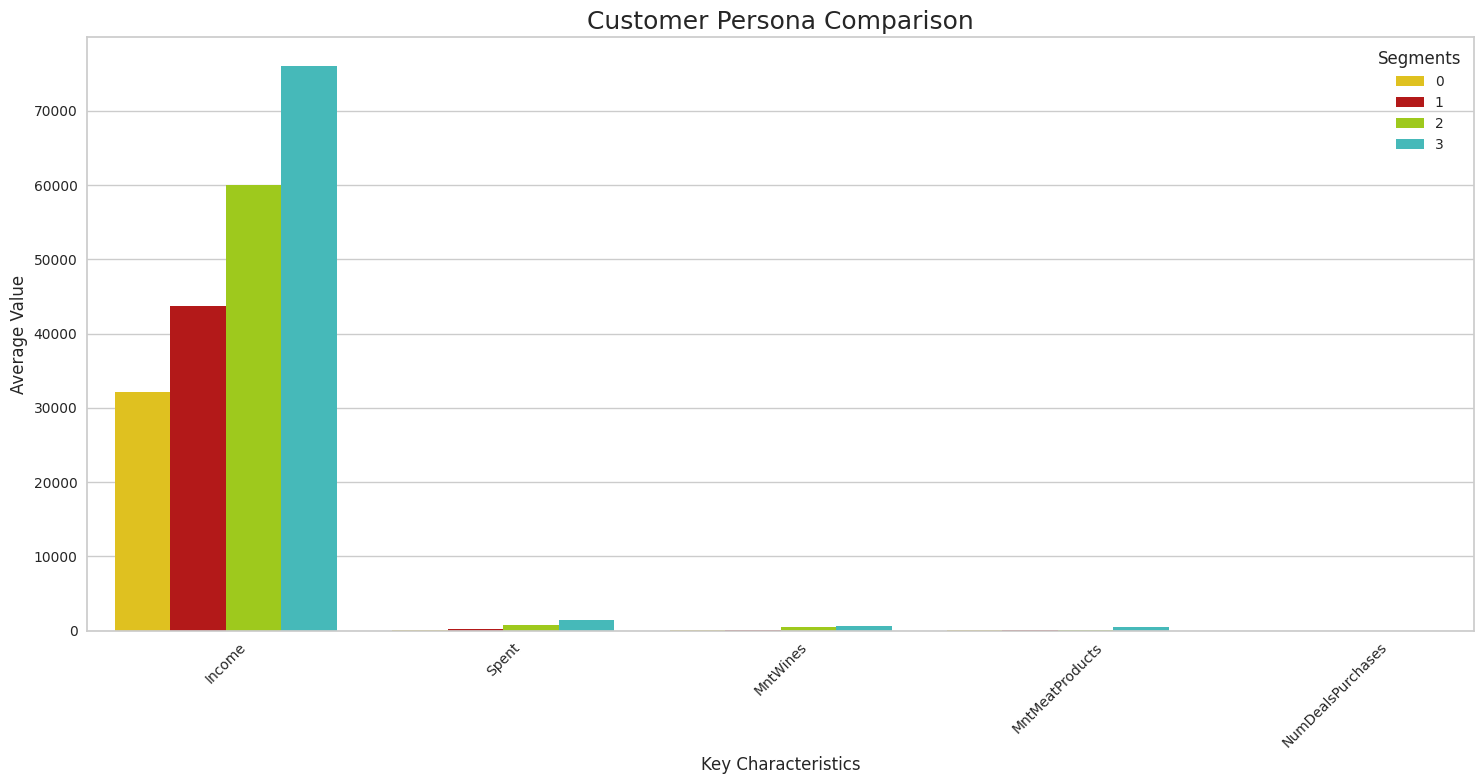

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's re-use the 'cluster_personas' DataFrame you created
# We can 'melt' the DataFrame to make it suitable for plotting with seaborn
persona_chart_data = cluster_personas.reset_index().melt(
    id_vars='Clusters', 
    value_vars=['Income', 'Spent', 'MntWines', 'MntMeatProducts', 'NumDealsPurchases']
)

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(
    data=persona_chart_data,
    x='variable',  # The feature (e.g., 'Income', 'Spent')
    y='value',     # The average value of that feature
    hue='Clusters',# Color the bars by cluster
    palette=pal    # Your color palette
)

# Add titles and labels
plt.title('Customer Persona Comparison', fontsize=18)
plt.xlabel('Key Characteristics', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Segments')
plt.tight_layout()
plt.show()


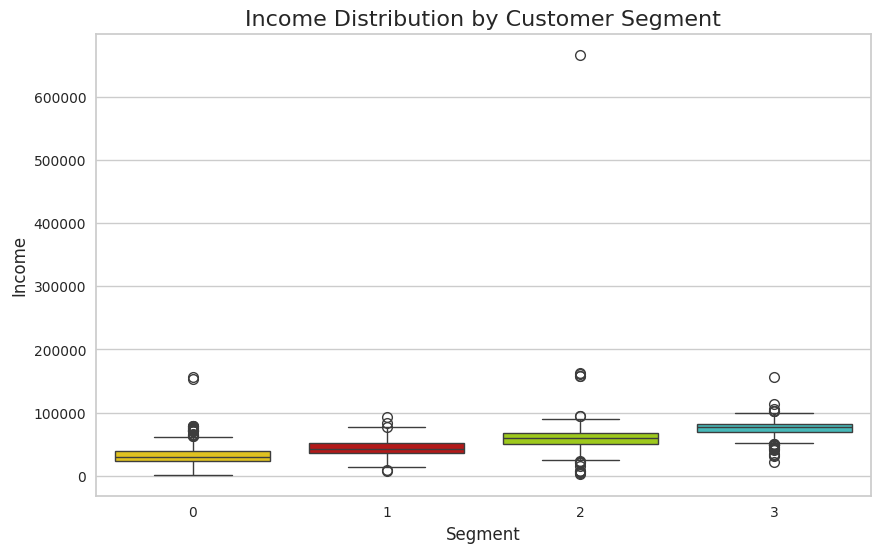

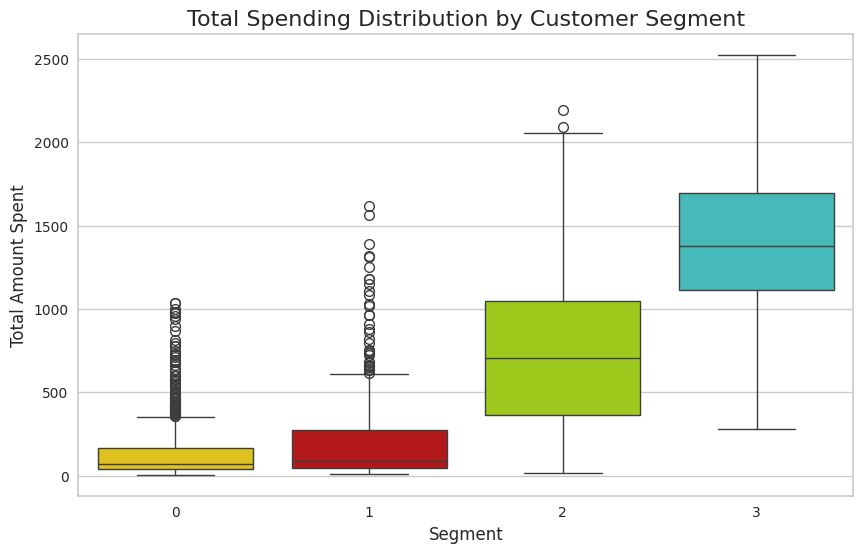

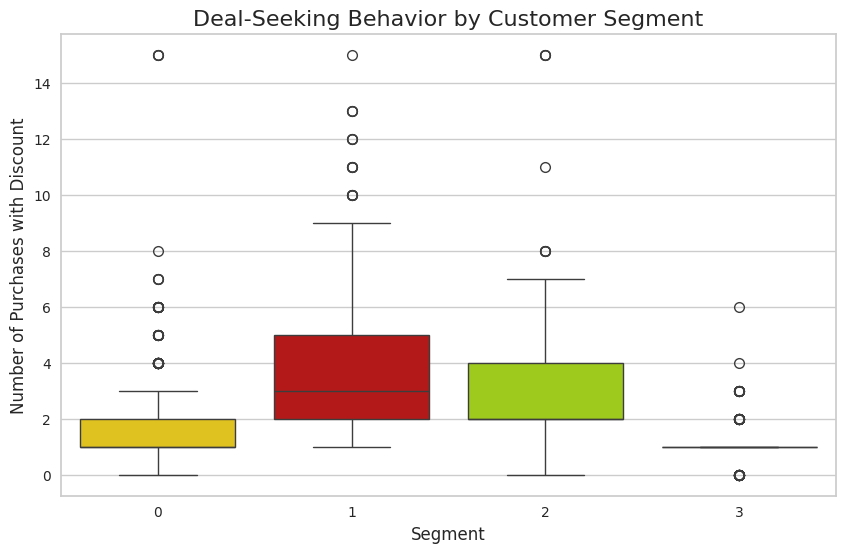

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# We will create a few box plots to see different aspects of the personas.
# Let's use the 'data_old' DataFrame and your 'pal' color palette.

# --- Plot 1: Income Distribution ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_old, x='Clusters', y='Income', palette=pal)
plt.title('Income Distribution by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.show()

# --- Plot 2: Total Spending Distribution ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_old, x='Clusters', y='Spent', palette=pal)
plt.title('Total Spending Distribution by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.show()

# --- Plot 3: Deal-Seeking Behavior ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_old, x='Clusters', y='NumDealsPurchases', palette=pal)
plt.title('Deal-Seeking Behavior by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Purchases with Discount', fontsize=12)
plt.show()


### 11 classification 